<a href="https://colab.research.google.com/github/imusicmash/explainability/blob/main/SHAP_github_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SHAP (SHapley Additive exPlanations)
is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

In [ ]:
!pip install shap

## Tree ensemble example
 (XGBoost/LightGBM/CatBoost/scikit-learn/pyspark models)
While SHAP can explain the output of any machine learning model, we have developed a high-speed exact algorithm for tree ensemble methods (see our Nature MI paper). Fast C++ implementations are supported for XGBoost, LightGBM, CatBoost, scikit-learn and pyspark tree models:

In [ ]:
import xgboost
import shap

In [ ]:
X, y = shap.datasets.california()

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


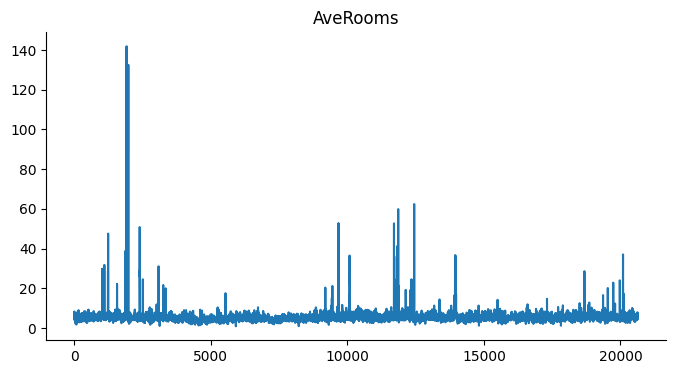

In [ ]:
# @title AveRooms

from matplotlib import pyplot as plt
X['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# check example labels
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)


In [ ]:
# prompt: how can i get the predicted value from the first record in X?


# Get the predicted value for the first record in X
predicted_value = model.predict(X.iloc[[0]])

print(f"Predicted value for the first record: {predicted_value[0]}")

Predicted value for the first record: 4.198637962341309


In [ ]:
predicted_value

array([4.198638], dtype=float32)

In [ ]:
shap_values.shape

(20640, 8)

In [ ]:
shap_values

.values =
array([[ 1.7081785 ,  0.09363674,  0.19277047, ...,  0.01571906,
        -0.39385185,  0.55515116],
       [ 1.426717  ,  0.03108795,  0.00601703, ...,  0.2112088 ,
        -0.36280793,  0.5884698 ],
       [ 1.3600677 ,  0.16082455,  0.47361216, ..., -0.02257477,
        -0.5582292 ,  0.5463798 ],
       ...,
       [-0.5842778 ,  0.01744973, -0.0949486 , ...,  0.10111337,
        -0.9798146 ,  0.3479332 ],
       [-0.6035651 ,  0.03118367, -0.05752674, ...,  0.23118298,
        -1.051862  ,  0.32962263],
       [-0.44976887,  0.02051439, -0.12479055, ..., -0.00343278,
        -0.85543966,  0.33553985]], dtype=float32)

.base_values =
array([2.0684865, 2.0684865, 2.0684865, ..., 2.0684865, 2.0684865,
       2.0684865], dtype=float32)

.data =
array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7

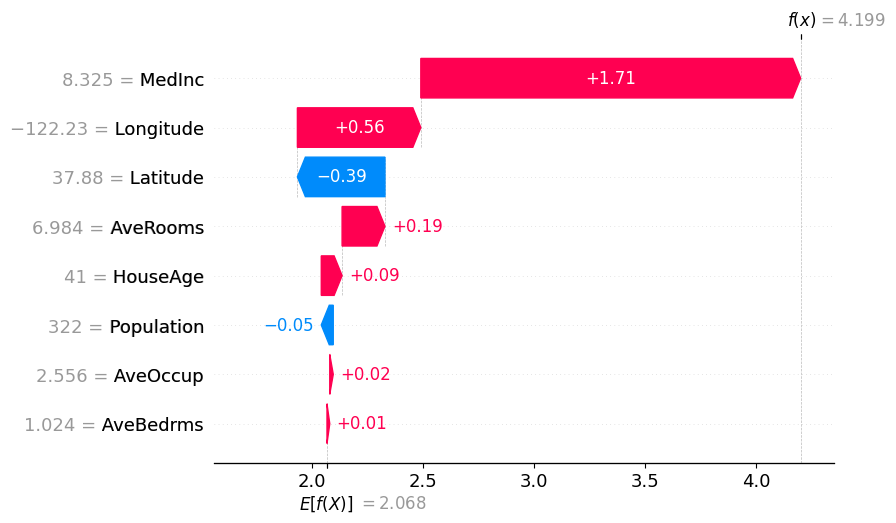

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

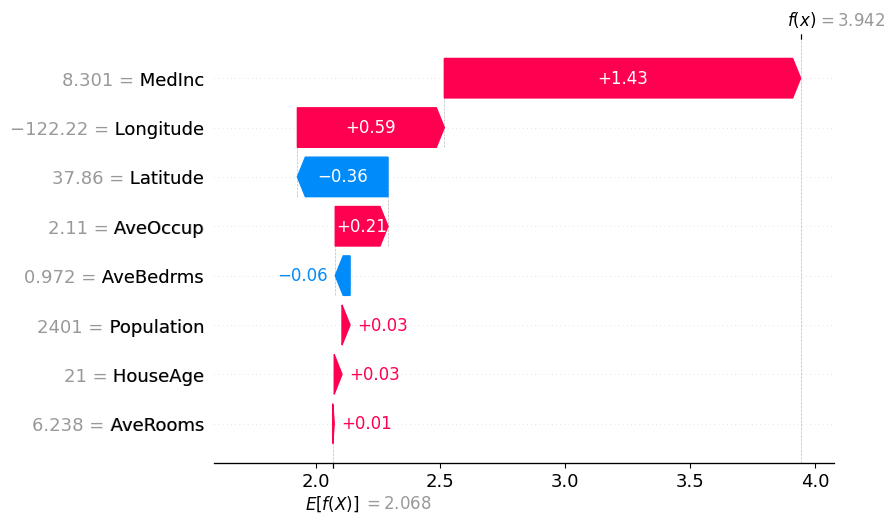

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
predicted_value = model.predict(X.iloc[[1]])

print(f"Predicted value for the first record: {predicted_value[0]}")

Predicted value for the first record: 3.9421401023864746


The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Another way to visualize the same explanation is to use a force plot (these are introduced in our Nature BME paper):

In [ ]:
shap_values.shape

(20640, 8)

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

In [ ]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values[:500])

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as the latitude changes. Vertical dispersion at a single value of latitude represents interaction effects with other features. To help reveal these interactions we can color by another feature. If we pass the whole explanation tensor to the color argument the scatter plot will pick the best feature to color by. In this case it picks longitude.

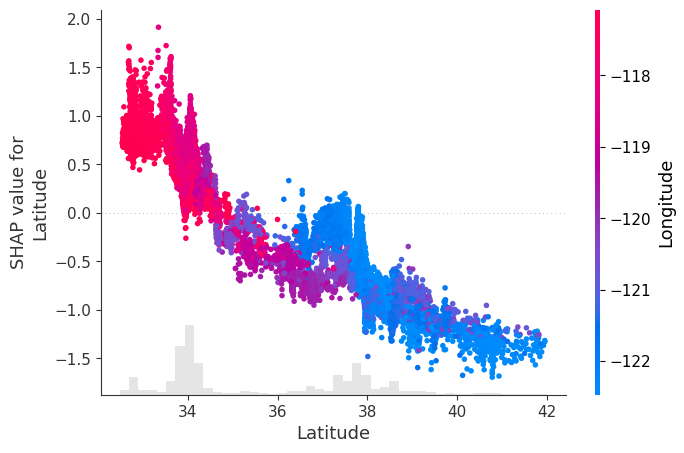

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that higher median incomes improves the predicted home price.

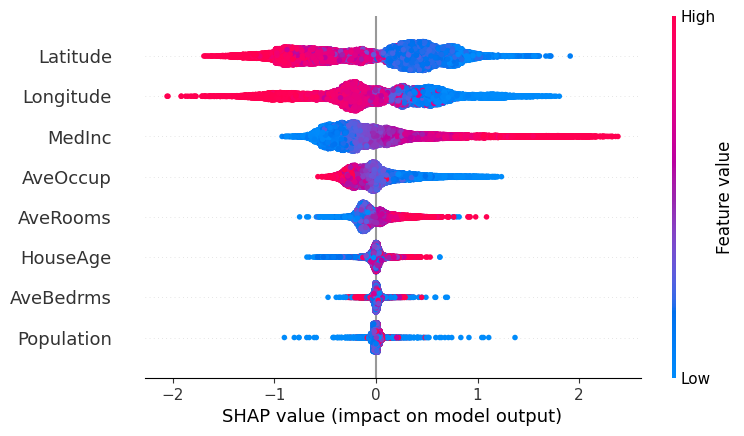

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

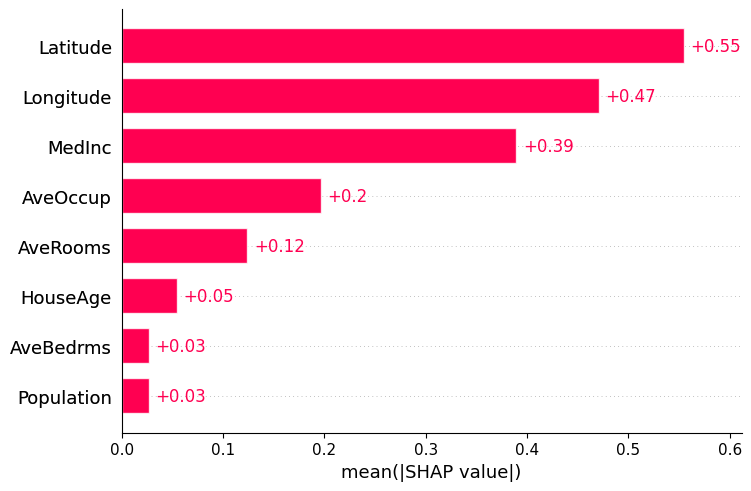

In [ ]:
shap.plots.bar(shap_values)